<a href="https://colab.research.google.com/github/Ephraim-Akolo/Image-Defective-Pixel/blob/main/W22020024_AI_ENHANCED_DETECTION_AND_CORRECTION_OF_DEFECTIVE_PIXELS_CURRENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI ENHANCED DETECTION AND CORRECTION OF DEFECTIVE PIXELS IN SMARTPHONE CAMERAS

**Here are some common types of defects a Smartphone Camera might encounter:**

1. **Dead Pixels**:
Dead pixels are non-functional pixels that do not respond to changes in light or color. They typically appear as black spots in an image.

2.  **Stuck Pixels**:
Stuck pixels are pixels that are constantly "on" and do not change color or brightness. They may appear as bright or colored dots in an image.

3.  **Hot Pixels**:
Hot pixels are pixels that consistently register as very bright, even in normal lighting conditions. They can create white or colored spots in images.


## DONWLOAD IMAGES FROM ONEDRIVE TO GOOGLE DRIVE


### The below Python notebook cells are scripts for downloading files and folders from OneDrive URLs using the OneDrive API. The script defines functions to facilitate the download process, iterates over a dictionary of directory URLs, and downloads datasets from each URL.

First we import some necessary modules such as requests, base64, os, Path, random, and shutil.

In [ ]:
import requests
import base64
import os
from pathlib import Path
import random
import shutil
from PIL import Image

Next, we define a function that takes a onedrive shared url to download and a filename to save the downloaded file.


In [ ]:
def download_file(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        # print(f'{filename} downloaded successfully.')
    else:
        print(f'Failed to download {filename}. Status code: {response.status_code}')

The `download_file` function is responsible for downloading a file from a given URL and saving it with a specified filename.

**Parameters:**

* url: A string representing the URL from which the file will be downloaded.
* filename: A string representing the name of the file to be saved locally.

In [ ]:
def download_folder_contents(folder_url, folder_path):
    response = requests.get(folder_url)
    if response.status_code == 200:
        data = response.json()
        for item in data['value']:
            item_name = item['name']
            if 'folder' in item:
                subfolder_url = item['webUrl']
                subfolder_path = os.path.join(folder_path, item_name)
                os.makedirs(subfolder_path, exist_ok=True)
                download_folder_contents(subfolder_url, subfolder_path)
            else:
                download_url = item['@content.downloadUrl']
                download_file(download_url, os.path.join(folder_path, item_name))

The `download_folder_contents` function is responsible for downloading the contents of a folder from a given URL recursively and saving them to a specified local folder path. If a file is found, it uses the above `download_file` to download the file.


**Parameters:**

* folder_url: A string representing the URL of the folder whose contents will be downloaded.
* folder_path: A string representing the local path where the contents of the folder will be

In [ ]:
def download_data_set(sharedUrl, root_folder_path):
    # Encode the sharedUrl to base64 and modify as per the cURL command
    encoded_url = base64.urlsafe_b64encode(sharedUrl.encode()).decode().rstrip('=').replace('/', '_').replace('+', '-')

    # Construct the URL to list items in the root folder
    root_folder_url = f'https://api.onedrive.com/v1.0/shares/u!{encoded_url}/driveItem/children'
    root_folder_path = f'/content/ROY_AI/{root_folder_path}'
    # Create a directory to store the downloaded files and folders
    os.makedirs(root_folder_path, exist_ok=True)

    download_folder_contents(root_folder_url, root_folder_path)

The `download_data_set` is a helper function to the `download_folder_contents`.The `download_data_set` function is designed to clean and encode properly the url befor passing it to the `download_data_set` function. It also creates the download folder where the files will be downloaded.

**Input Parameters:**
* sharedUrl: A string representing the shared URL of the dataset on OneDrive.
* root_folder_path: A string indicating the root folder path where the dataset will be downloaded.

In [ ]:

dirs = {
  'Agfa_DC-733S': "https://1drv.ms/f/s!AgqMcuvKcm6shMxM8jRYgZXkoaWtIw?e=pyph9s",
  'Agfa_DC-830I': "https://1drv.ms/f/s!AgqMcuvKcm6shMxNDRwBsImOqZIUfg?e=ty569n",
  'Kodak_M1063_0': "https://1drv.ms/f/s!AgqMcuvKcm6shMxObQf03tqELGCXjQ?e=amxnek",
  'Kodak_M1063_1': "https://1drv.ms/f/s!AgqMcuvKcm6shMxPqp0CE-cu2DyDzw?e=9AZSyh",
  'Nikon_D200_0': "https://1drv.ms/f/s!AgqMcuvKcm6shMxQQec-eNszVzTvrQ?e=hmcc6I",
  'Nikon_D200_1': "https://1drv.ms/f/s!AgqMcuvKcm6shMxR_Vlkq3N1iZW6Bw?e=WLmuA0",
  'Panasonic_DMC-FZ50_0': "https://1drv.ms/f/s!AgqMcuvKcm6shMxSH82vSdfUt5muwQ?e=YUAJjb",
  'Panasonic_DMC-FZ50_1': "https://1drv.ms/f/s!AgqMcuvKcm6shMxTDUOBRDPpERhd8A?e=4r3vqu",
  'Sony_DSC-H50_0': "https://1drv.ms/f/s!AgqMcuvKcm6shMxU91-s1JLdQJW5lQ?e=W55RhZ",
  'Sony_DSC-H50_1': "https://1drv.ms/f/s!AgqMcuvKcm6shMxVVkmijWjf7kdBtQ?e=OOz79N"
}


`dirs` is a dictionary containing the folders in the ondrive directory and the corresponding shared url.

In [ ]:
# for key, val in dirs.items():
#    download_data_set(val, key)

After defining all functions neccessary for the download of image files in the onedrive folder, here we finally loop through all folders specified in *dirs* dictionary, and for each folder and its shared url, we pass the folder name and the url to the `download_data_set` to download all its content to the google drive. This should only be ran once to download the data.

## Move Images To Train And Test Directory In A Given Ratio



### Once the we have the downloaded files in our google drive, we can then split them split the images into two parts, Training set and Test set. The Training set will be used to train the model and the test set will be used to evaluate the model's performance. Throughout the training process, the model will never see or come across the images in the test set.

In [ ]:

def resize_and_save_image(image_path, target_path, max_size=512):
    try:
        # Open the image file
        with Image.open(image_path) as img:
            # Resize the image while maintaining the aspect ratio
            img.thumbnail((max_size, max_size))
            # Save the resized image
            img.save(target_path)
    except Exception as e:
        print(f"Error resizing or saving {image_path}: {e}")

def split_images(source_dir, target_train_dir, target_test_dir, split_ratio=0.8, max_size=255):
    source_dir = Path(source_dir)
    target_train_dir = Path(target_train_dir)
    target_test_dir = Path(target_test_dir)

    # Validate source directory
    if not source_dir.is_dir():
        raise ValueError(f"Source directory '{source_dir}' does not exist.")

    # Create target directories if they don't exist
    target_train_dir.mkdir(parents=True, exist_ok=True)
    target_test_dir.mkdir(parents=True, exist_ok=True)

    # Loop through all subdirectories in the source directory
    for source_subdir in source_dir.iterdir():
        if source_subdir.is_dir():
            # Get the list of image files in the source subdirectory
            image_files = [f for f in source_subdir.glob('*') if f.suffix.lower() in ['.jpg', '.jpeg', '.png', '.gif']]

            if not image_files:
                print(f"No image files found in {source_subdir}. Skipping...")
                continue

            # Shuffle the list of image files
            random.shuffle(image_files)

            # Calculate the split indices
            split_index = int(len(image_files) * split_ratio)

            # Split the image files into training and testing sets
            train_images = image_files[:split_index]
            test_images = image_files[split_index:]

            # Copy and resize training images
            for image in train_images:
                target_filename = f"{source_subdir.name}_{image.name}"
                target_path = target_train_dir / target_filename
                resize_and_save_image(image, target_path, max_size)

            # Copy and resize testing images
            for image in test_images:
                target_filename = f"{source_subdir.name}_{image.name}"
                target_path = target_test_dir / target_filename
                resize_and_save_image(image, target_path, max_size)


The `split_images function is designed to split images from a source directory into training and testing sets, then copy them to target directories accordingly .The function ensures that the target training and testing directories exist. If they don't, it creates them. It also shuffles the list of image files in each source subdirectory to ensure randomness.

**Input Parameters:**
* source_dir: The directory path containing the source images.
* target_train_dir: The directory path where training images will be copied.
* target_test_dir: The directory path where testing images will be copied.
* split_ratio (optional): The ratio of images to be allocated for the training set. Default is 0.8, meaning 80% for training and 20% for testing.

In [ ]:
# Define the path to your dataset
source_directory = '/content/ROY_AI/'
target_training_directory = '/content/drive/MyDrive/W22020024_AI_MODELS/datasets/training'
target_testing_directory = '/content/drive/MyDrive/W22020024_AI_MODELS/datasets/testing'

We have defined where the bulk data is: *source_directory*, and where the testing and training data will be copied to.

In [ ]:
# #this creates the google drive folder for the dataset splitting into testing ans training i ran this once to avoid creating duplicate images.
# split_images(source_directory, target_training_directory, target_testing_directory, split_ratio=0.8)

We then call the `split_images` function to execute and split the images randomly in the specified ratio, copying the test and train data to the specified location

## DATA PREPROCESSING

### IMPLEMENT DEFFECTS SIMULATION FUNCTIONS

Our dataset only contains normal images from smartphones, so we need to intentionally introduce deffects to normal images so our model tries to correct them. Below are the functions which tries to simulate each of the deffects discussed earlier.

In [ ]:
import cv2
import numpy as np

We need to import the numpy and cv2 packages which is used for numerical analysis and image processing.

In [ ]:
def simulate_dead_pixels(image_np:np.ndarray, dead_pixel_value=0, probability=0.01):
    """
    Add a dead pixel defect to the input image represented as a NumPy array.

    Parameters:
      image_np (np.ndarray): Input image represented as a NumPy array of shape (height, width, channels).
      dead_pixel_value (int or float): Value to replace dead pixel with (default: 0).
      probability (float): Probability of adding a dead pixel to each pixel location (default: 0.01).

    Returns:
      np.ndarray: Image array with added dead pixel defects.
    """
    mask = np.random.random(image_np.shape[:2]) < probability

    # Replace pixel values with dead_pixel_value at locations where mask is True
    image_np_with_defects = np.copy(image_np)
    image_np_with_defects[mask] = dead_pixel_value

    return image_np_with_defects

The `simulate_dead_pixels` function takes an input image represented as a NumPy array (image) along with parameters to simulate dead pixels. This function allows for the simulation of dead pixels in an input image by randomly selecting pixel coordinates and assigning them a specified value.

In [ ]:
def simulate_hot_pixels(image_np:np.ndarray, hot_pixel_value=255, probability=0.01):
    """
    Add a hot pixel defect to the input image represented as a NumPy array.

    Parameters:
      image_np (np.ndarray): Input image represented as a NumPy array of shape (height, width, channels).
      hot_pixel_value (int or float): Value to replace hot pixel with (default: 255, typically white for RGB images).
      probability (float): Probability of adding a hot pixel to each pixel location (default: 0.01).

    Returns:
      np.ndarray: Image array with added hot pixel defects.
    """
    mask = np.random.random(image_np.shape[:2]) < probability

    # Replace pixel values with hot_pixel_value at locations where mask is True
    image_np_with_defects = np.copy(image_np)
    for channel in range(3):  # Loop over image channels (e.g., RGB)
        image_np_with_defects[..., channel][mask] = hot_pixel_value

    return image_np_with_defects

The `simulate_hot_pixels` function takes an input image represented as a NumPy array (image) along with parameters to simulate hot pixels.The function allows for the simulation of hot pixels in an input image by randomly selecting pixel coordinates and assigning them a specified color.

In [ ]:
def simulate_stuck_pixels(image_np:np.ndarray, stuck_pixel_value=255, probability=0.01):
    """
    Add a stuck pixel defect to the input image represented as a NumPy array.

    Parameters:
      image_np (np.ndarray): Input image represented as a NumPy array of shape (height, width, channels).
      stuck_pixel_value (int or float): Value to replace stuck pixel with (default: 255, typically white for RGB images).
      probability (float): Probability of adding a stuck pixel to each pixel location (default: 0.01).

    Returns:
      np.ndarray: Image array with added stuck pixel defects.
    """
    mask = np.random.random(image_np.shape[:2]) < probability

    # Replace pixel values with stuck_pixel_value at locations where mask is True
    image_np_with_defects = np.copy(image_np)
    image_np_with_defects[mask] = (0, stuck_pixel_value, 0)

    return image_np_with_defects


The `simulate_stuck_pixels` function takes an input image represented as a NumPy array (image) along with parameters to simulate stuck pixels. This function allows for the simulation of stuck pixels in an input image by randomly selecting pixel coordinates and assigning them a specified color.

In [ ]:
def simulate_tensor_defective_pixels(image, probability=0.002,
                         dead_pixel_value=(0, 0, 0),
                         stuck_pixel_value=(0, 255, 0),
                         hot_pixel_value=(255, 255, 255)):
    """
    Add a single type of defect (dead, stuck, or hot) to each image in the batch represented as a TensorFlow tensor.

    Parameters:
      image (tf.Tensor): Input image represented as a TensorFlow tensor of shape (batch_size, height, width, channels).
      probability (float): Probability of adding a defect pixel to each pixel location (default: 0.01).
      dead_pixel_value (tuple or list): Pixel values for dead pixels (default: (0, 0, 0)).
      stuck_pixel_value (tuple or list): Pixel values for stuck pixels (default: (0, 0, 255)).
      hot_pixel_value (tuple or list): Pixel values for hot pixels (default: (255, 0, 0)).

    Returns:
      tf.Tensor: Image tensor with added defect pixels.
      tf.Tensor: Mask tensor indicating locations of defect pixels (True for defect pixels, False otherwise).
    """
    batch_size, height, width, channels = image.shape
    if batch_size is None:
      batch_size = 32 #TODO: FIND A WAY AROUND HARDCODING THIS VALUE AS IT MAY BE A SOURCE OF A FUTURE BUG.

    # Generate random mask for defect pixels based on the selected defect type
    mask = tf.random.uniform(shape=(batch_size, height, width), dtype=tf.float32) < probability # if np.random.random() > 1 else probability/10)
    mask = tf.expand_dims(mask, axis=-1)  # Expand mask to match image shape (batch_size, height, width, 1)

    # Generate random defect type for each image in the batch (0: dead, 1: stuck, 2: hot)
    defect_types = tf.random.uniform(shape=(batch_size,), minval=0, maxval=3, dtype=tf.int32)

    # Create defect pixel values tensor based on defect type
    defect_pixel_values = tf.stack([
        tf.convert_to_tensor(dead_pixel_value, dtype=image.dtype),
        tf.convert_to_tensor(stuck_pixel_value, dtype=image.dtype),
        tf.convert_to_tensor(hot_pixel_value, dtype=image.dtype)
    ], axis=0)  # Stack defect values along a new axis

    defect_image = tf.gather(defect_pixel_values, defect_types)  # Select defect values based on defect type

    # Reshape defect_image for broadcasting
    defect_image = tf.expand_dims(defect_image, axis=1)
    defect_image = tf.expand_dims(defect_image, axis=1)

    # Apply defect pixel values to the image based on the mask
    defective_image = tf.where(mask, defect_image, image)

    return defective_image/255.0, mask


Add a single type of defect (dead, stuck, or hot) to each image in the batch represented as a TensorFlow tensor.

    Parameters:
      image (tf.Tensor): Input image represented as a TensorFlow tensor of shape (batch_size, height, width, channels).
      probability (float): Probability of adding a defect pixel to each pixel location (default: 0.01).
      dead_pixel_value (tuple or list): Pixel values for dead pixels (default: (0, 0, 0)).
      stuck_pixel_value (tuple or list): Pixel values for stuck pixels (default: (0, 0, 255)).
      hot_pixel_value (tuple or list): Pixel values for hot pixels (default: (255, 0, 0)).

### LOAD DATASETS TO MEMORY

To load our image data using tensorflow, we have to import tensorflow and related packages.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import shutil
import random
import os
from math import ceil
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


Next we specify the location of the dataset, the batch size, and the image size.

In [ ]:
dataset_directory = '/content/drive/MyDrive/W22020024_AI_MODELS/datasets/'
batch_size = 32
img_height = 512
img_width = 512
img_size = (img_width, img_height)

Next we will implement some helper functions to aid in Data Defection and Augumentation.

In [ ]:
def normalize(image):
    return tf.cast(image, tf.float32) / 255.0

The `normalize` function takes an image tensor as input and returns the normalized version of the image. This function is used to scale pixel values in the range [0, 255] to the range [0, 1], making it suitable for input to neural networks.

**Input Parameter:**

* image: A TensorFlow tensor representing the input image.

In [ ]:
def flatten_image(image):
    return tf.keras.layers.Flatten()(image)

The `flatten_image` function takes an image tensor as input and flattens it using the Flatten layer from TensorFlow Keras. This layer reshapes the tensor into a 1D array while preserving the total number of elements. This function is useful when you need to convert a multi-dimensional image tensor (e.g., a 3D tensor representing an image with height, width, and channels) into a 1D tensor.

**Input Parameter:**

* image: A TensorFlow tensor representing the input image.

In [ ]:
def prepare_target(image):
  return flatten_image(normalize(image))

The `prepare_target` function prepares the target image for training by applying two preprocessing steps: flattening and normalization.

**Input Parameter:**

* image: A TensorFlow tensor representing the input image.

In [ ]:
def apply_augmentation(image:np.ndarray, methods=[]):
  if callable(methods):
    return methods(image)
  if not (isinstance(methods, list) or isinstance(methods, tuple)):
    raise Exception("methods must be a callable, list or tuple!")
  l = len(methods)
  idx = np.random.randint(0, l+1)
  if idx != l:
    method = methods[idx]
    image = method(image)
  return image


The `apply_augmentation` function applies a random selection of augmentation methods to an input image. This is used to apply random defections to images using the defects simulation function implemented earlier.

**Input Parameters:**

* image: The input image as a NumPy array.
* methods: A list of augmentation/defection methods to apply to the image. Each method is a function that takes an image as input and returns an augmented/defected image.

In [ ]:
defect_methods={
    "dead" : lambda y: simulate_dead_pixels(y),
    "stuck" : lambda y: simulate_stuck_pixels(y),
    "hot" : lambda y: simulate_hot_pixels(y),
}

def custom_augmentation(image):
    augmented_image = tf.py_function(
        lambda x: apply_augmentation(x.numpy(), list(defect_methods.values())),
        [image],
        tf.float32
    )
    return normalize(augmented_image)

The `custom_augmentation` function applies a series of custom augmentation techniques to an input image using TensorFlow operations. The function uses tf.py_function to apply a custom augmentation pipeline to the input image.
Within the tf.py_function call, the apply_augmentation function is invoked with a list of defection functions.
The list includes the following defection methods:

* simulate_dead_pixels: Simulates dead pixels on the image.
* simulate_stuck_pixels: Simulates stuck pixels with random colors.
* simulate_hot_pixels: Simulates hot pixels on the image.

In [ ]:
def load_datasets_correction(dataset_dir, img_size=img_size, subset='training', validation_split=.2):
  ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode=None,
    validation_split=validation_split,
    subset=subset,
    shuffle=True,
    seed=42
    )
  return ds.map(lambda x: (tf.map_fn(custom_augmentation, x, fn_output_signature=tf.float32), prepare_target(x))).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

def load_datasets_classification(dataset_dir, img_size=img_size, subset='training', validation_split=.2):
  ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode=None,
    validation_split=validation_split,
    subset=subset,
    shuffle=True,
    seed=42
    )
  return ds.map(simulate_tensor_defective_pixels).cache().prefetch(buffer_size=tf.data.AUTOTUNE)


The `load_datasets` function is responsible for loading image datasets from a specified directory, applying custom augmentation techniques, and preparing the data for training.The function uses *keras.utils.image_dataset_from_directory* to load images from the specified directory.
It configures the dataset to include images of a specific size (img_size), batching them with a predefined batch size (batch_size defined earlier).
It also specifies a validation split if subset='training', shuffles the data, and sets a random seed for reproducibility. The augmented dataset is cached to memory to improve performance during training.
It also prefetches data to ensure that data loading does not become a bottleneck during training, utilizing the tf.data.AUTOTUNE buffer size for optimal performance. The function returns the augmented and prepared dataset ready for model training.


**Input Parameters:**

* dataset_dir: The directory path containing the image dataset.
* img_size: The target size for the images in the dataset. It is assumed that this variable is defined elsewhere in the code.
* subset: Specifies whether to load the full dataset or a subset (e.g., 'training' or 'validation').
* validation_split: The proportion of the dataset to use for validation if subset='training'.

In [ ]:
train_ds = load_datasets_correction(target_training_directory, subset="training")
validation_ds = load_datasets_correction(target_training_directory, subset="validation")
test_ds = load_datasets_correction(target_testing_directory, subset=None, validation_split=None)

train_ds_clf = load_datasets_classification(target_training_directory, subset="training")
validation_ds_clf = load_datasets_classification(target_training_directory, subset="validation")
test_ds_clf = load_datasets_classification(target_testing_directory, subset=None, validation_split=None)

Found 1600 files belonging to 1 classes.
Using 1280 files for training.
Found 1600 files belonging to 1 classes.
Using 320 files for validation.
Found 400 files belonging to 1 classes.
Found 1600 files belonging to 1 classes.
Using 1280 files for training.
Found 1600 files belonging to 1 classes.
Using 320 files for validation.
Found 400 files belonging to 1 classes.


We then use the `load_datasets` to load the train and test set lazily and dynamically to memory from the directory. 20% of the training set is further splitted into Validation set which is used to ensure that the model is learning and also in model selection.

## DATA VISUALIZATION

Before we start building our model, we are going to visually inspect our dataset of images along with the generated defective images.

In [ ]:
def display_tensor_images_from_dataset(dataset):
    # Get one batch of data from the dataset

    for batch in dataset.take(1):
        images = batch[0]
        labels = batch[1]

    # Display images and labels side by side
    plt.figure(figsize=(20, 15))

    for i in range(min(4, len(images))):  # Display at most 4 images for better visualization
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Defect {i+1}")
        plt.axis("off")

        plt.subplot(2, 4, i + 5)
        plt.imshow(labels[i].numpy())
        plt.title(f"Mask {i+1}")
        plt.axis("off")

    plt.show()

def display_images_from_dataset(dataset):
    # Get one batch of data from the dataset

    for batch in dataset.take(1):
        image = batch[0][np.random.randint(0, 16)]
        label = batch[1][np.random.randint(0, 16)]
        break

    # Display images and labels side by side
    plt.figure(figsize=(20, 15))
    label = label.numpy().reshape((*img_size, 3)) * 255
    label = label.astype(np.uint8)

    plt.subplot(1, len(defect_methods)+1, 1)
    plt.imshow(label)
    plt.title("clear")
    plt.axis("off")

    for i, (name, _defect) in enumerate(defect_methods.items()):
        plt.subplot(1, len(defect_methods)+1, i + 2)
        defect_label = _defect(label)
        plt.imshow(defect_label)
        plt.title(name)
        plt.axis("off")

    plt.show()

The `display_images_from_dataset` function is designed to visualize defective images and their corresponding normal images from the loaded dataset. This function provides a convenient way to visually inspect the batch of images and their corresponding defects. It displays 4 defective images and the corresponding clear image below it.

**Input Parameter:**

* dataset: The dataset containing image-image pairs.

Random Images from the correction data

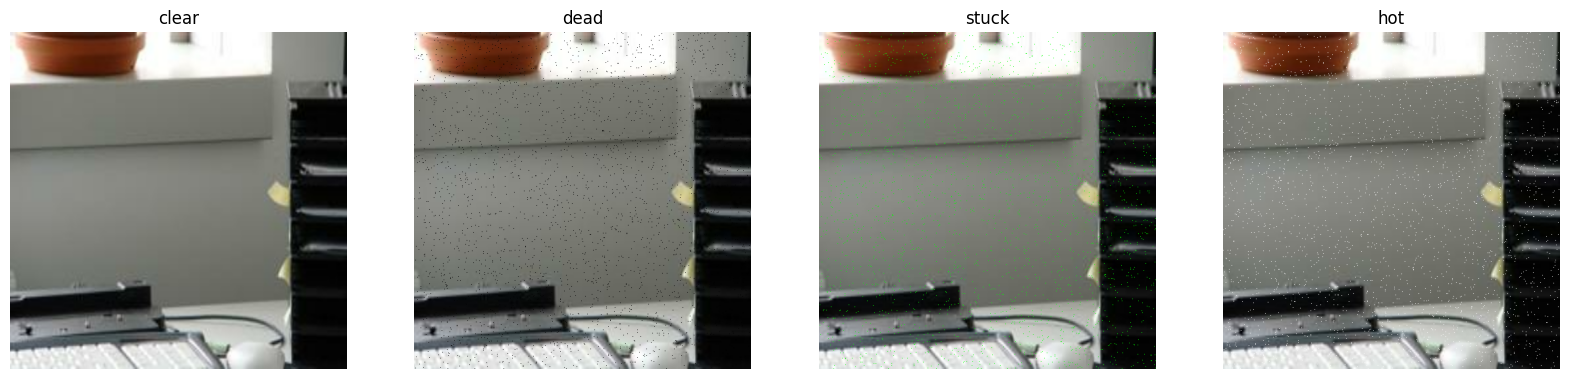

In [ ]:
display_images_from_dataset(train_ds)

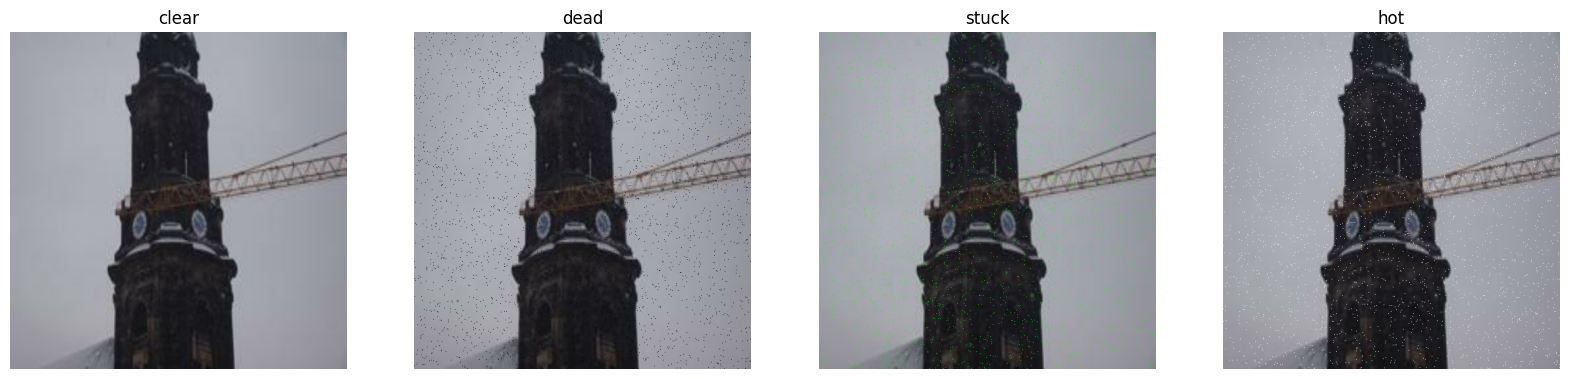

In [ ]:
display_images_from_dataset(train_ds)

Random Images from the classification set

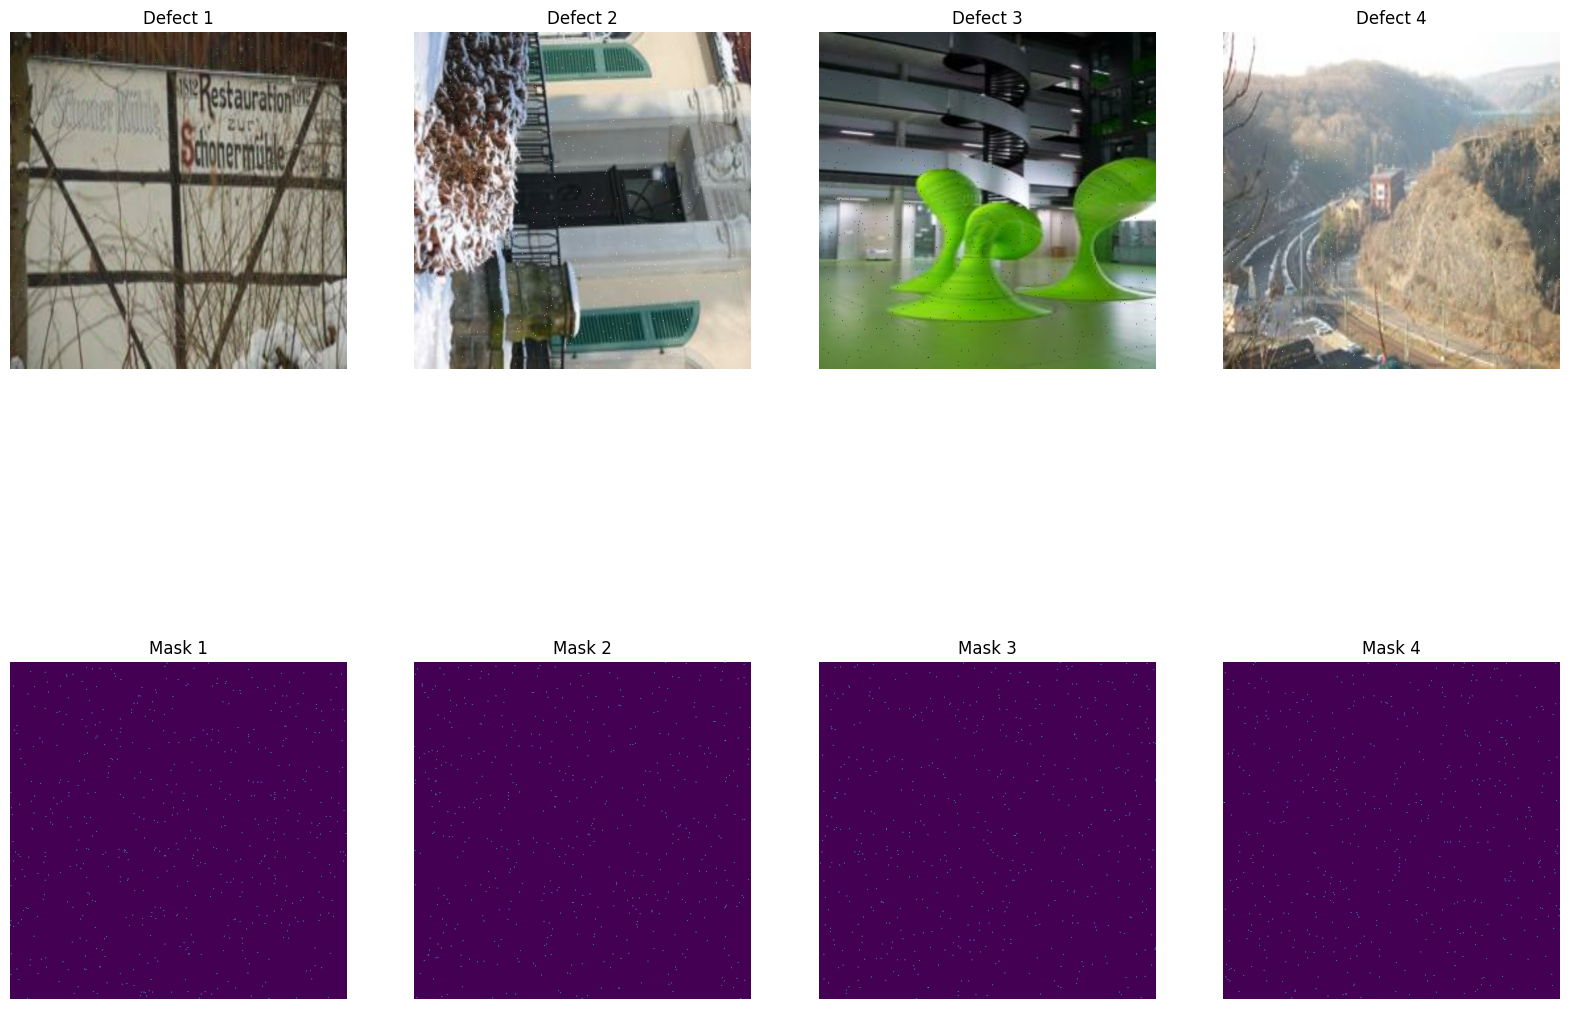

In [ ]:
display_tensor_images_from_dataset(train_ds_clf)

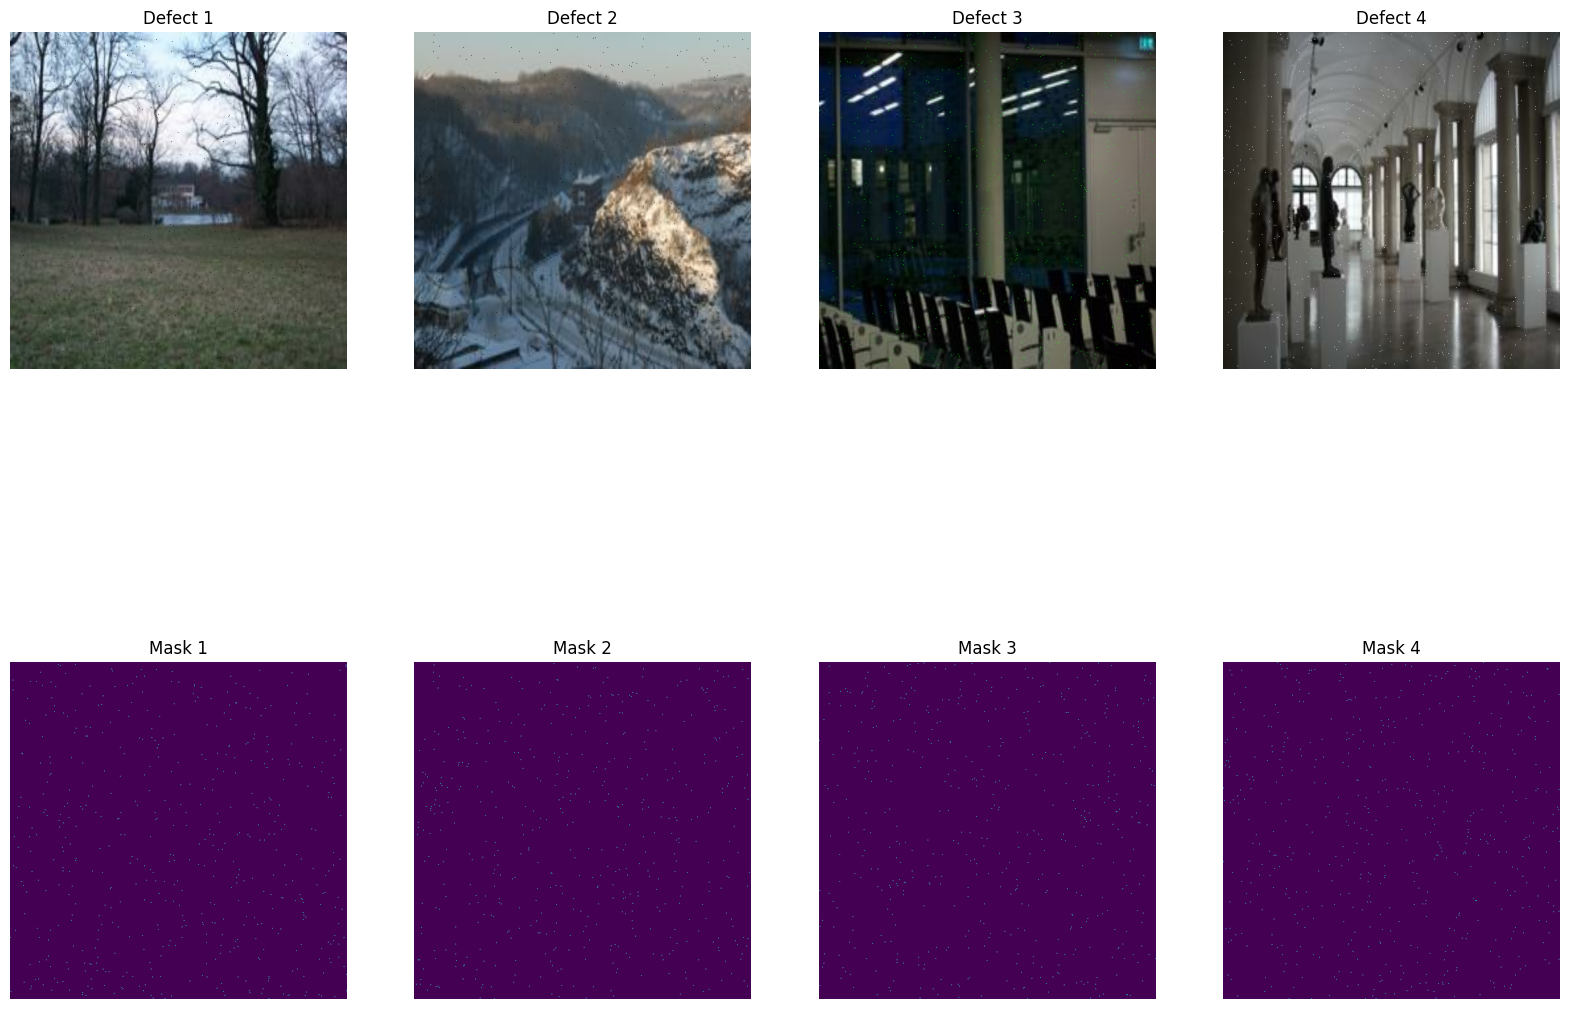

In [ ]:
display_tensor_images_from_dataset(train_ds_clf)

## CLASSIFICATION USING U-NET MODEL

In [ ]:
def double_conv_block(x, n_filters):

    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)

    return x

The function `double_conv_block` defines a double convolutional block, which consists of two convolutional layers with the same number of filters. Each convolutional layer is followed by a Rectified Linear Unit (ReLU) activation function. The convolutional layers have a kernel size of 3x3, use the "same" padding to ensure the output has the same spatial dimensions as the input, and are initialized with the He normal initializer.

**Parameters:**

* x: Input tensor or layer.
* n_filters: Number of filters for the convolutional layers.

**Returns:**

* x: Output tensor after passing through the double convolutional block.


In [ ]:
def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(0.3)(p)

    return f, p

The function `downsample_block` defines a downsample block, which first applies a double convolutional block using the double_conv_block function, followed by max-pooling with a kernel size of 2x2 and a dropout layer with a dropout rate of 0.3.

**Parameters:**

* x: Input tensor or layer.
* n_filters: Number of filters for the convolutional layers.


**Returns:**

* f: Output tensor after passing through the double convolutional block.
* p: Output tensor after max-pooling and dropout.

In [ ]:
def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
    # concatenate
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(0.3)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)

    return x

This function `upsample_block` defines an upsample block, which first applies transposed convolution (also known as deconvolution) to upsample the input tensor, followed by concatenation with the convolutional features from the corresponding downsample block. After concatenation, dropout is applied with a dropout rate of 0.3, and then the tensor passes through a double convolutional block.

**Parameters:**

* x: Input tensor or layer.
* conv_features: Convolutional features from the corresponding downsample block.
* n_filters: Number of filters for the convolutional layers.


**Returns:**

* x: Output tensor after passing through the upsample block.

In [ ]:
def build_unet_model(classification=False):

    # inputs
    inputs = layers.Input(shape=(*img_size,3))


    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 512)

    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 64)
    if classification:
      # outputs
      outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)

      # unet model with Keras Functional API
      unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    else:
      # outputs
      outputs = layers.Conv2D(3, 1, padding="same", activation = "sigmoid")(u9)

      #flatten
      flattened_outputs = layers.Flatten()(outputs)

      # unet model with Keras Functional API
      unet_model = keras.Model(inputs, flattened_outputs, name="U-Net")

    return unet_model



The function `build_unet_model` is made up of both the encoder (contracting path) and the decoder (expanding path). In the encoder phase, it applies four downsampling blocks to reduce spatial dimensions while augmenting the number of filters to extract intricate features from the input image. These downsampling blocks consist of two convolutional layers with ReLU activation, accompanied by max-pooling and dropout layers for regularization. The bottleneck segment employs a double convolutional block to further refine and consolidate extracted features. Subsequently, the decoder segment executes four upsampling blocks, mirroring the structure of the downsampling phase. Each upsampling block integrates feature maps from the encoder through concatenation, facilitating precise localization. Finally, a convolutional layer with a sigmoid activation generates the segmentation map, and a flatten layer represents the ouput in a one dimensional vector which represents the predicted or corrected image.


Below is the model summary:

In [ ]:
unet_model_clf = build_unet_model(classification=True)
unet_model_clf.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 512, 512, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 512, 512, 64)         36928     ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 256, 256, 64)         0         ['conv2d_20[0][0]']           
 g2D)                                                                                         

In [ ]:
unet_model_clf.compile(optimizer=tf.keras.optimizers.Adam(),
  loss="binary_crossentropy",
  metrics="accuracy")

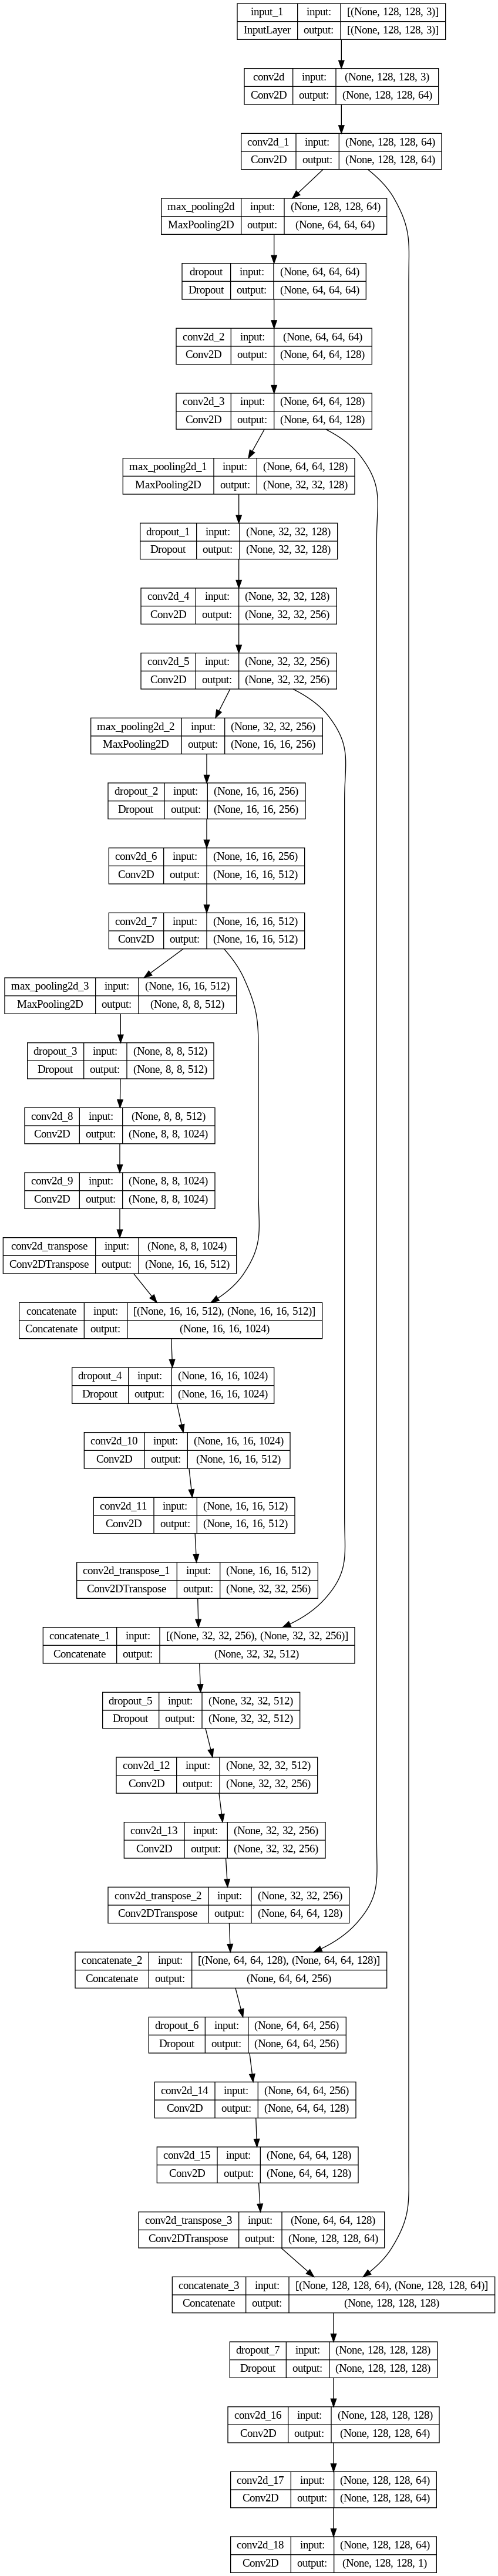

In [ ]:
tf.keras.utils.plot_model(unet_model_clf, show_shapes=True)

In [ ]:
def create_model_callback(name="best_model.h5", patience=20, monitor='val_loss', save_best_only=True):
  model_path = Path('/content/drive/MyDrive/W22020024_AI_MODELS/classification/models/')
  model_path.mkdir(parents=True, exist_ok=True)

  callbacks = [
      # save model
      keras.callbacks.ModelCheckpoint(filepath=str(model_path/name), monitor=monitor, save_best_only=save_best_only),
      # stop when changes become little
      keras.callbacks.EarlyStopping(monitor=monitor,patience=patience)
  ]
  return callbacks

In [ ]:
unet_hist_clf = unet_model_clf.fit(
   train_ds_clf,
   validation_data=validation_ds_clf,
   epochs=100,
   callbacks=create_model_callback(name='clf_unet_best_model1.h5'),
    )

In [ ]:
def plot_history_clf(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

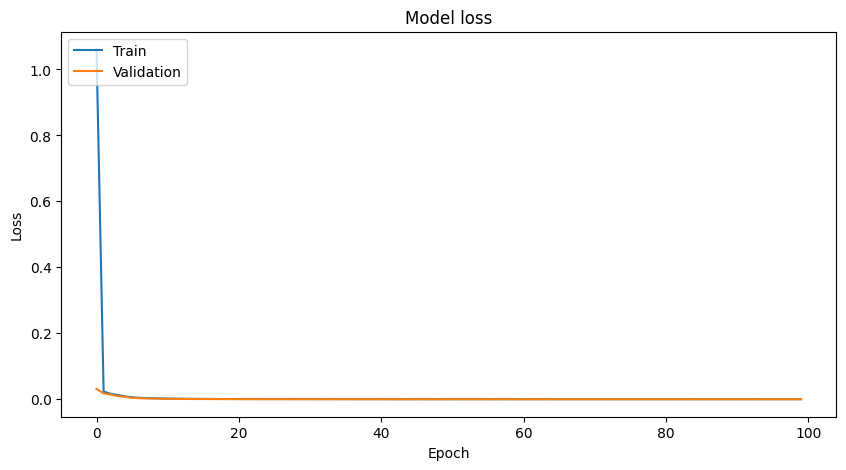

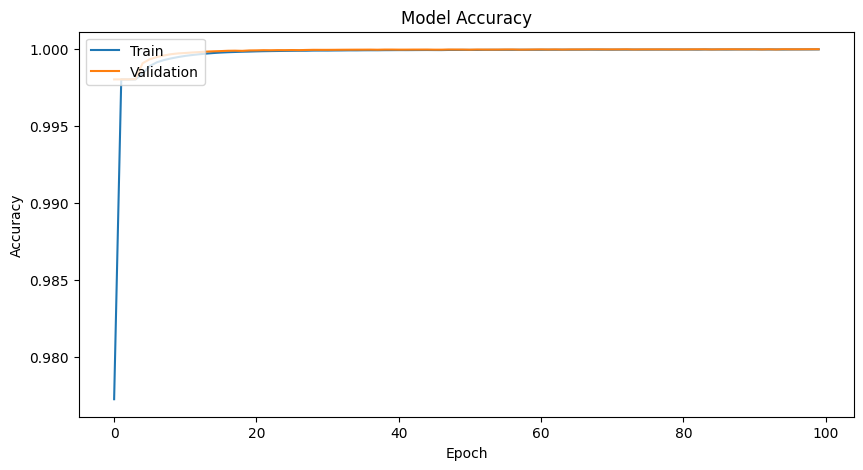

In [ ]:
plot_history_clf(unet_hist_clf)

In [ ]:
# Save the Model
unet_model_clf.save('/content/drive/MyDrive/W22020024_AI_MODELS/models/unet_clf_model_1.keras')

### Model Classification Evaluation

In [ ]:
def get_true_pred_labels(model, dataset, class_names):

  true_labels = []
  predicted_labels = []

  # Iterate over dataset batches
  for images, labels in dataset:
      # Predict batch of images using the model
      predictions = model.predict(images);

      # # Convert one-hot encoded labels to class indices
      # true_batch_labels = tf.argmax(labels, axis=1)
      # predicted_batch_labels = tf.argmax(predictions, axis=1)

      true_batch_labels = flatten_image(labels)
      predicted_batch_labels = flatten_image(predictions) > 0.5

      # Append batch labels to the lists
      true_labels.extend(true_batch_labels.numpy()[0])
      predicted_labels.extend(predicted_batch_labels.numpy()[0])
  return true_labels, predicted_labels

In [ ]:
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
  # Compute confusion matrix
  cm = confusion_matrix(true_labels, predicted_labels)

  # Plot confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Print the confusion matrix values
  thresh = cm.max() / 2.
  for i, j in np.ndindex(cm.shape):
      plt.text(j, i, format(cm[i, j], 'd'),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()

In [ ]:
clf_class_names = ['non-defective', 'defective']

In [ ]:
clf_y_true_1, clf_y_pred_1 = get_true_pred_labels(unet_model_clf, test_ds_clf, clf_class_names)


1/1 [==============================] - 0s 20ms/step


In [ ]:
print(classification_report(clf_y_true_1, clf_y_pred_1))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    196202
        True       1.00      1.00      1.00       406

    accuracy                           1.00    196608
   macro avg       1.00      1.00      1.00    196608
weighted avg       1.00      1.00      1.00    196608



In [ ]:
print("\n\nEvaluation Accuracy on test dataset for detecting any type of defect is: ", accuracy_score(clf_y_true_1, clf_y_pred_1)*100, "%")



Evaluation Accuracy on test dataset for detecting any type of defect is:  99.99949137369791 %


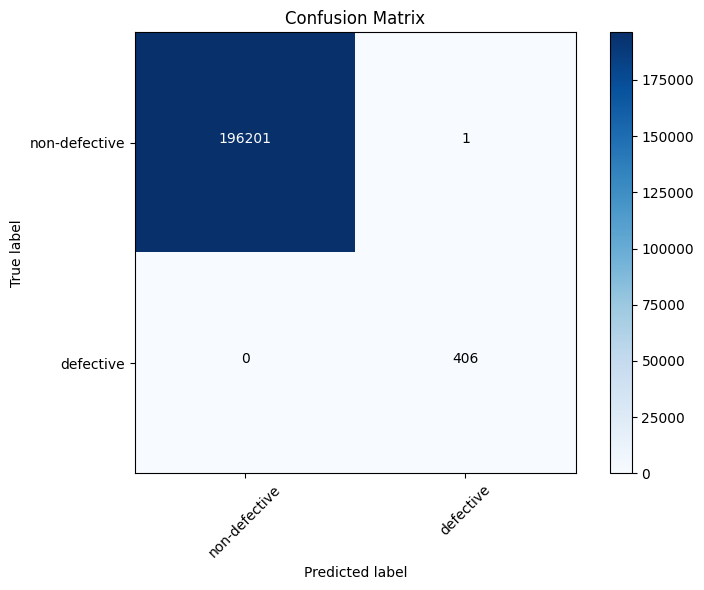

In [ ]:
plot_confusion_matrix(clf_y_true_1, clf_y_pred_1, clf_class_names);



### Visual Inspection

In [ ]:
# Load the Model
unet_model_clf = tf.keras.models.load_model('/content/drive/MyDrive/W22020024_AI_MODELS/models/unet_clf_model_1.keras')

In [ ]:
def display_clf_images_from_models(dataset, model = None):
    # Get one batch of data from the dataset

    for batch in dataset.take(np.random.randint(1, len(dataset))):
        image_1 = batch[0][0].numpy()
        label_1 = batch[1][0].numpy()

    # Display images and labels side by side
    plt.figure(figsize=(16, 6))

    for i in range(4):  # Display at most 4 images for better visualization
        if i == 0:
          img_1 = image_1
          title = f"Defect Image"
        elif i == 1:
          img_1 = label_1
          title = f"True Mask"
        elif i == 2:
          img_1 = (model.predict(tf.expand_dims(image_1, axis=0))[0] > 0.5)
          masked_image_reshaped = (img_1*image_1)[img_1[:, :, 0]]
          defect_type = 'non-defective' if len(masked_image_reshaped) == 0 else 'dead' if masked_image_reshaped.sum() < 0.1 else 'hot' if masked_image_reshaped.sum()/(len(masked_image_reshaped)*3)>0.99 else 'stuck'
          # print(masked_image_reshaped.sum(), len(masked_image_reshaped))
          title = f"Predicted Mask"
        elif i == 3:
          if defect_type == 'dead':
            img_cpy = np.copy(image_1)
            img_cpy[:, :, :] = .8
            img_1 = ~img_1 * img_cpy
          else:
            img_1 = img_1 * image_1
          title = f"Defect type: {defect_type} pixels"


        plt.subplot(1, 5, i + 1)
        plt.imshow(img_1)
        plt.title(title)
        plt.axis("off")

    plt.show()

1/1 [==============================] - 0s 455ms/step


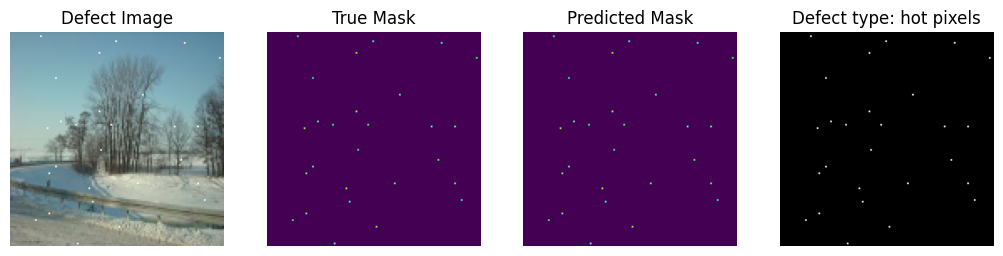

In [ ]:
display_clf_images_from_models(test_ds_clf, unet_model_clf)

1/1 [==============================] - 0s 431ms/step


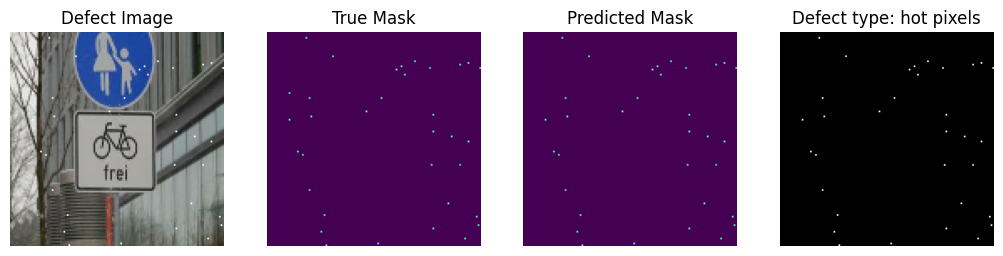

In [ ]:
display_clf_images_from_models(test_ds_clf, unet_model_clf)

## CORRECTION MODEL DEVELOPMENT



### USING SIMPLE CNN ARCHITECTURE



Convolutional Neural Networks (CNNs) are a class of deep neural networks, most commonly applied to analyzing visual imagery. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input images

In [ ]:
cnn_model = keras.models.Sequential([
    layers.Input(shape=(*img_size,3)),
    layers.Conv2D(64, 3, padding="same", activation="relu", kernel_initializer="he_normal"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, 3, padding="same", activation="relu", kernel_initializer="he_normal"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(256, 3, padding="same", activation="relu", kernel_initializer="he_normal"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(3, 3, padding="same", activation="relu", kernel_initializer="he_normal"),
    layers.Flatten(),
    layers.Dense(img_size[0]*image[1]*3, activation="sigmoid")
])

The `cnn_model` is designed to process input images of size 128x128 pixels with 3 color channels (RGB). It is made up of four convolutional layers, progressively increasing in filter size from 64 to 256, each followed by a max-pooling layer to downsample the spatial dimensions. Dropout layers are inserted after each max-pooling layer to mitigate overfitting by randomly dropping units during training. The final convolutional layer outputs three channels, and the resulting feature maps are flattened before passing through a dense layer with a sigmoid activation function. The model's objective is to learn hierarchical representations of features in the input defected images and generate predictions of the clear image pixels value based on these learned features.

Below is the models architectural summary:

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0

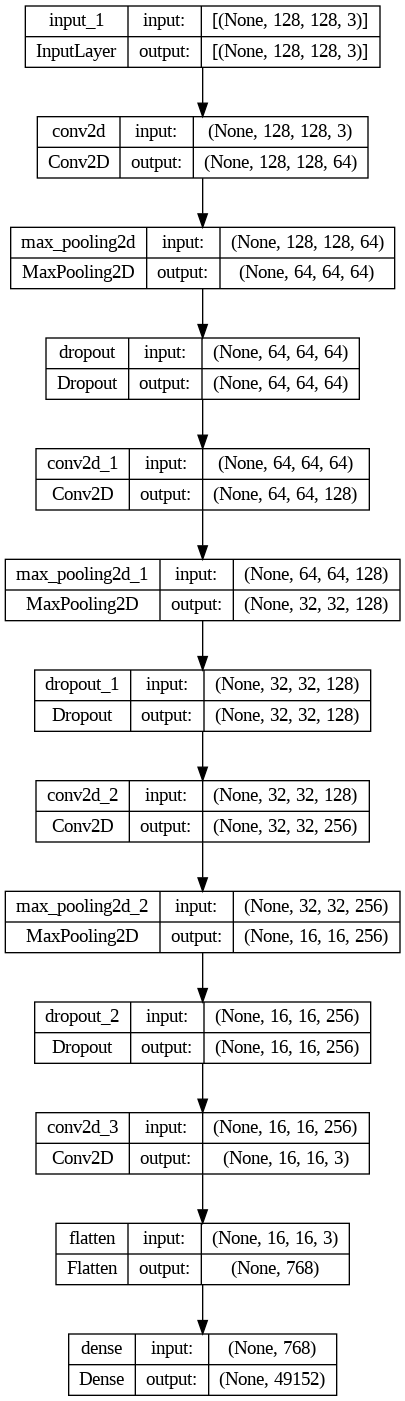

In [ ]:
tf.keras.utils.plot_model(cnn_model, show_shapes=True)

### USING RESIDUAL NETWORK ARCHITECTURE

---



Residual Networks (ResNets) revolutionized deep neural network architectures by introducing skip connections, which enabled the training of extremely deep networks by mitigating the vanishing gradient problem. In ResNets, basic building blocks called residual blocks contain two convolutional layers with a shortcut connection that adds the original input to the output of the block. This approach allows the network to learn residual functions, making it easier to train deeper architectures. ResNets typically use global average pooling instead of fully connected layers for classification, further reducing overfitting. Variants like ResNet-18, ResNet-50, and others have achieved state-of-the-art performance on various image recognition tasks, making ResNet a cornerstone architecture in modern deep learning.

In [ ]:
resnet_50v2 = keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(*img_size, 3),
    pooling="max",
    classifier_activation=None,
)

resnet_model = keras.models.Sequential([
    layers.Input(shape=(*img_size,3)),
    resnet_50v2,
    layers.Flatten(),
    layers.Dense(img_size[0]*image[1]*3, activation='sigmoid')
])

The ResNet-50V2 model is instantiated without the top classification layer and with no pre-trained weights. It takes input images with dimensions of 128x128 pixels and 3 color channels. The max-pooling operation is applied, and no activation is applied to the classifier. This ResNet-50V2 model is integrated into a Sequential model alongside a Flatten layer and a Dense layer with a sigmoid activation function.


The summary below displays the architecture of the model, including the number of parameters in each layer and the total number of trainable parameters.

In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 49152)             100712448 
                                                                 
Total params: 124277248 (474.08 MB)
Trainable params: 124231808 (473.91 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________


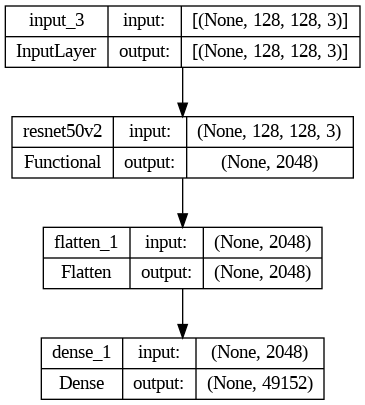

In [ ]:
tf.keras.utils.plot_model(resnet_model, show_shapes=True)

### USING U-NET ARCHITECTURE

The U-Net architecture is a convolutional neural network (CNN) specifically tailored for biomedical image segmentation tasks, particularly in medical imaging contexts like MRI or CT scans. It consists of a contracting path (encoder) followed by an expansive path (decoder), resembling an hourglass shape. The contracting path gradually reduces spatial dimensions while increasing feature channels through convolutional layers and downsampling operations, while the expansive path upsamples the feature maps back to the original resolution while decreasing the number of channels. Key to its success are the extensive skip connections that directly connect corresponding encoder and decoder layers, enabling the decoder to recover spatial details lost during downsampling. With its ability to effectively capture both local and global contextual information and its relatively low parameter count, U-Net has become a staple architecture in medical image analysis, finding applications beyond biomedical fields such as in our case image correction.

In [ ]:
unet_model = build_unet_model()
unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d_4[0][0]']            
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)           0         ['conv2d_5[0][0]']            
 g2D)                                                                                         

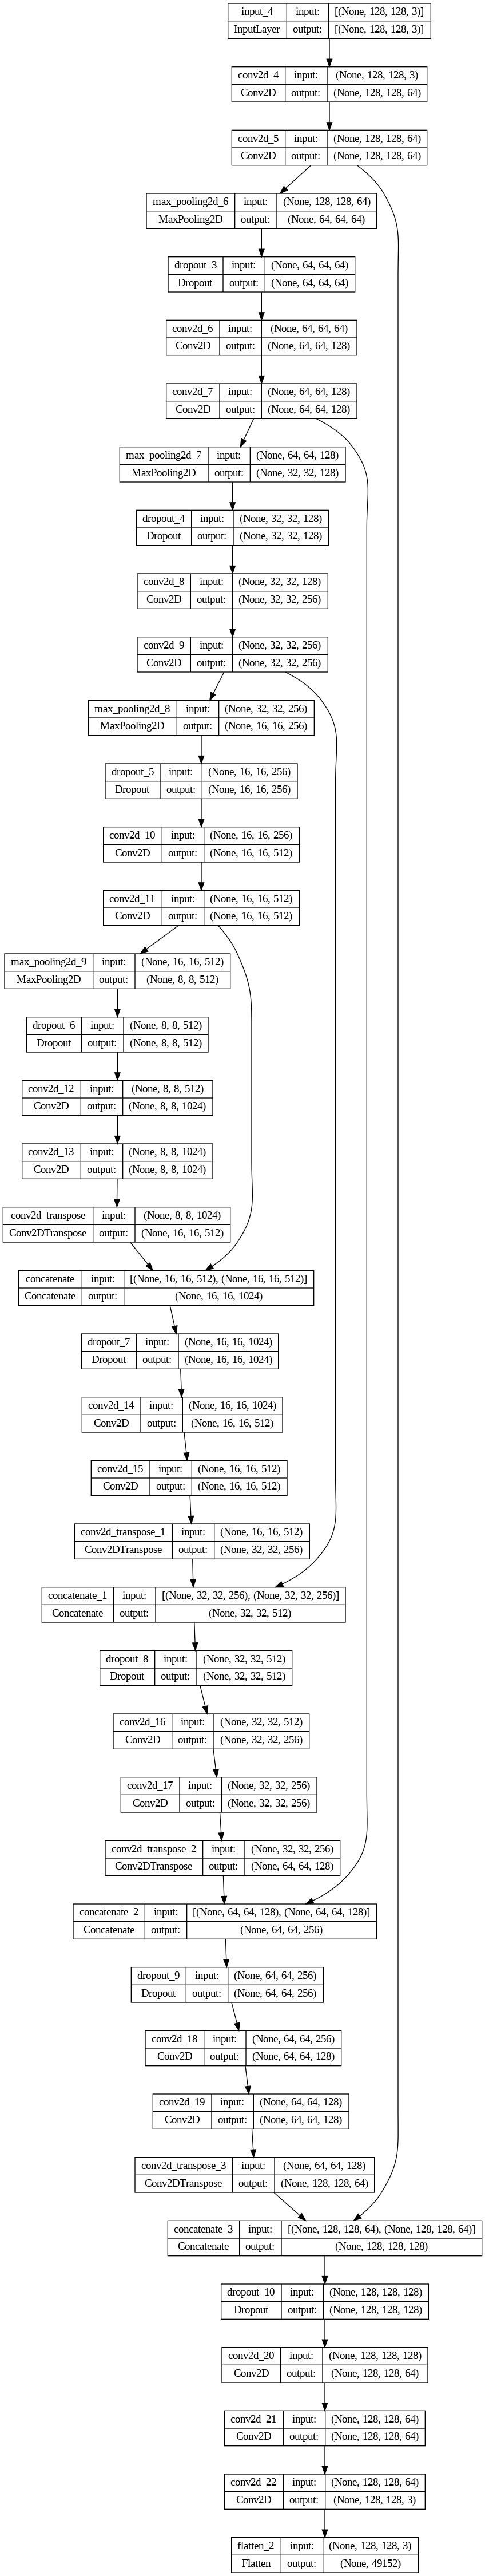

In [ ]:
tf.keras.utils.plot_model(unet_model, show_shapes=True)

## MODEL TRAINING

In [ ]:
cnn_model.compile(optimizer='adam',
               loss='mse',  # Mean Squared Error loss
               metrics=['mae'])

In [ ]:
resnet_model.compile(optimizer='adam',
               loss='mse',  # Mean Squared Error loss
               metrics=['mae'])

In [ ]:
unet_model.compile(optimizer='adam',
               loss='mse',  # Mean Squared Error loss
               metrics=['mae'])

The `compile` method is used to configure the learning process of the convolutional neural network (CNN) model, the following arguments are specified:

* optimizer: 'adam' is used which refers to the Adam optimization algorithm. Adam is an adaptive learning rate optimization algorithm that is well-suited for training deep neural networks.

* loss: The loss function used to compute the difference between the true labels and the predicted values during training. Here, 'mse' is specified, which stands for Mean Squared Error. Mean Squared Error calculates the average squared difference between the predicted and true values. It is commonly used for regression problems.

* metrics: A list of metrics used to evaluate the performance of the model. In this case, ['mae'] is specified, which stands for Mean Absolute Error. Mean Absolute Error calculates the average absolute difference between the predicted and true values. It provides a measure of the average magnitude of errors in the predictions.

In [ ]:
def plot_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation accuracy values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model Mean Absolute Error')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

The `plot_history` function shows how a neural network model performs during training and validation. It creates two plots: one for displaying training and validation loss values and another for showing training and validation mean absolute error (MAE) values. The plots help in understanding how well the model is learning over time. The x-axis represents the epochs (training iterations), while the y-axis shows the corresponding loss or MAE values. Training data is shown in one color, and validation data is shown in another, allowing easy comparison. These visualizations are useful for assessing the model's performance and identifying any issues like overfitting or underfitting.

### Training the simple CNN model

In [ ]:
#cnn_hist = cnn_model.fit(
   # train_ds,
   # validation_data=validation_ds,
    #epochs=100,
   # )

Epoch 1/100
40/40 [==============================] - 23s 334ms/step - loss: 0.0726 - mae: 0.2306 - val_loss: 0.0725 - val_mae: 0.2291
Epoch 2/100
40/40 [==============================] - 2s 39ms/step - loss: 0.0719 - mae: 0.2296 - val_loss: 0.0718 - val_mae: 0.2281
Epoch 3/100
40/40 [==============================] - 2s 40ms/step - loss: 0.0712 - mae: 0.2286 - val_loss: 0.0712 - val_mae: 0.2271
Epoch 4/100
40/40 [==============================] - 2s 40ms/step - loss: 0.0706 - mae: 0.2277 - val_loss: 0.0706 - val_mae: 0.2263
Epoch 5/100
40/40 [==============================] - 2s 40ms/step - loss: 0.0701 - mae: 0.2269 - val_loss: 0.0701 - val_mae: 0.2255
Epoch 6/100
40/40 [==============================] - 2s 40ms/step - loss: 0.0697 - mae: 0.2261 - val_loss: 0.0697 - val_mae: 0.2248
Epoch 7/100
40/40 [==============================] - 2s 40ms/step - loss: 0.0693 - mae: 0.2255 - val_loss: 0.0693 - val_mae: 0.2242
Epoch 8/100
40/40 [==============================] - 2s 40ms/step - loss: 

We called the fit method of the model and passed the training and validation data. An epoch of 100 was also given so the model is trained through all the batches of the data 100 times.

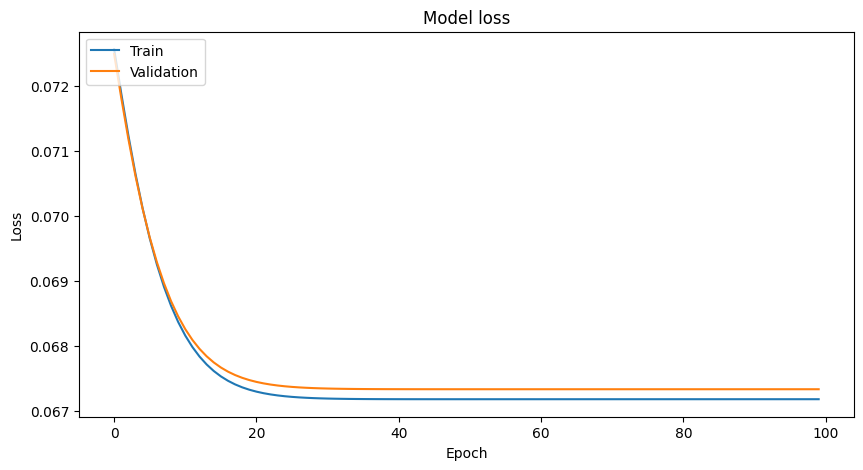

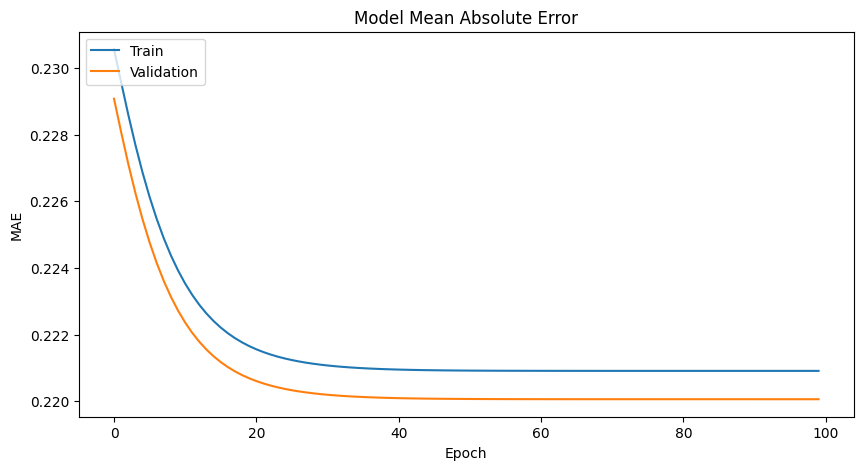

In [ ]:
plot_history(cnn_hist)



We then use the `plot_history` function from earlier to make a graph plot of the models training loss over time and also the evaluation metrics.

**Simple CNN Training Log:**

It seems that both training and validation losses are decreasing consistently for about 10 epochs, indicating that the model is learning effectively and not overfitting, but that changes as it began overfitting the data from 10 to 25 epochs. Learning stops from about 40 epochs showing convergence at a loss of about 0.674.

In [ ]:
# Save the Model
cnn_model.save('/content/drive/MyDrive/W22020024_AI_MODELS/models/cnn_model_1.keras')


We call the `save` method to save the trained model on our google drive so we can always load and use the model anytime.

### Training the Res-Net model



In [ ]:
#resnet_hist = resnet_model.fit(
    #train_ds,
    #validation_data=validation_ds,
    #epochs=100,
   # )

Epoch 1/100
40/40 [==============================] - 34s 117ms/step - loss: 0.0675 - mae: 0.2148 - val_loss: 0.2813 - val_mae: 0.4622
Epoch 2/100
40/40 [==============================] - 3s 81ms/step - loss: 0.0608 - mae: 0.2026 - val_loss: 0.2890 - val_mae: 0.4662
Epoch 3/100
40/40 [==============================] - 3s 81ms/step - loss: 0.0524 - mae: 0.1851 - val_loss: 0.2934 - val_mae: 0.4701
Epoch 4/100
40/40 [==============================] - 3s 81ms/step - loss: 0.0469 - mae: 0.1715 - val_loss: 0.2239 - val_mae: 0.3900
Epoch 5/100
40/40 [==============================] - 3s 81ms/step - loss: 0.0438 - mae: 0.1645 - val_loss: 0.0822 - val_mae: 0.2179
Epoch 6/100
40/40 [==============================] - 3s 81ms/step - loss: 0.0396 - mae: 0.1548 - val_loss: 0.0547 - val_mae: 0.1764
Epoch 7/100
40/40 [==============================] - 3s 80ms/step - loss: 0.0373 - mae: 0.1490 - val_loss: 0.0414 - val_mae: 0.1550
Epoch 8/100
40/40 [==============================] - 3s 80ms/step - loss: 

We called the fit method of the model and passed the training and validation data. An epoch of 100 was also given so the model is trained through all the batches of the data 100 times.

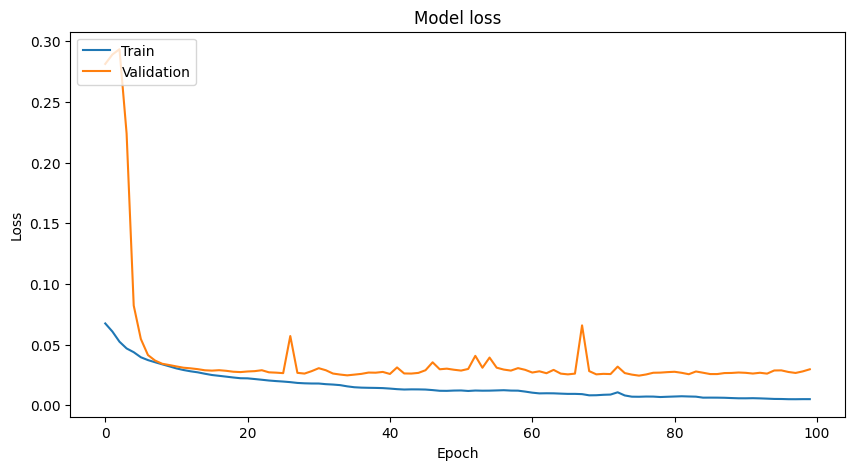

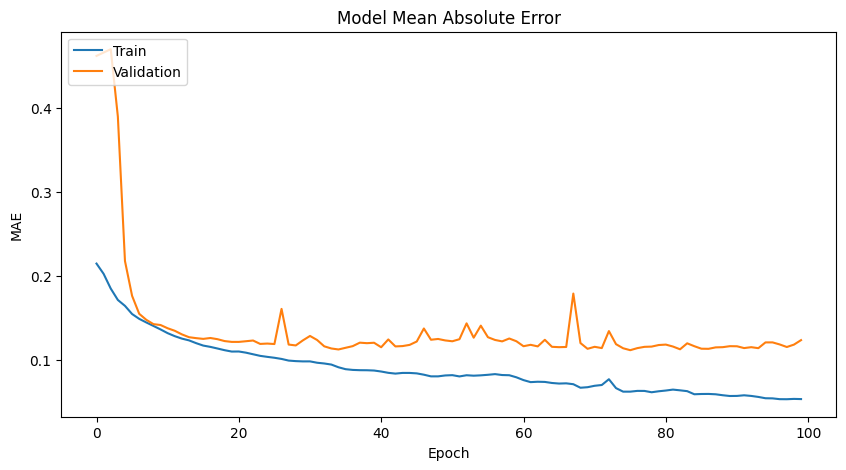

In [ ]:
plot_history(resnet_hist)

We then use the `plot_history` function from earlier to make a graph plot of the models training loss over time and also the evaluation metrics.

**Res-Net Training Log**

It seems that only training loss is decreasing consistently and we see a choppiness in the validation loss, but it quick converges. This is usually not a problem as we can see an overrall reduction in training and validation loss which is much lower than the simple CNN model. But we also notice that the model is begining to overfit the training data as the number of epochs approaches 100, which will mean we have to employ more regularization techinuques in our model architecture and improve our learning performance. But overrall this model is also a promising model as it still has potential of learning and achieving even less errors in image correction.

In [ ]:
# Save the Model
resnet_model.save('/content/drive/MyDrive/W22020024_AI_MODELS/models/resnet_model_1.keras')

We call the `save` method to save the trained model on our google drive so we can always load and use the model anytime.

### Training the U-Net model

In [ ]:
unet_hist = unet_model.fit(
   train_ds,
   validation_data=validation_ds,
   epochs=100,
   callbacks=create_model_callback(name='unet_best_model1.h5'),
    )

Epoch 1/100
40/40 [==============================] - ETA: 0s - loss: 0.0375 - mae: 0.1515

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 69s 813ms/step - loss: 0.0375 - mae: 0.1515 - val_loss: 0.0050 - val_mae: 0.0540
Epoch 2/100
40/40 [==============================] - 33s 822ms/step - loss: 0.0044 - mae: 0.0495 - val_loss: 0.0021 - val_mae: 0.0328
Epoch 3/100
40/40 [==============================] - 30s 751ms/step - loss: 0.0027 - mae: 0.0386 - val_loss: 0.0013 - val_mae: 0.0261
Epoch 4/100
40/40 [==============================] - 28s 716ms/step - loss: 0.0020 - mae: 0.0325 - val_loss: 0.0010 - val_mae: 0.0226
Epoch 5/100
40/40 [==============================] - 22s 554ms/step - loss: 0.0015 - mae: 0.0283 - val_loss: 0.0012 - val_mae: 0.0257
Epoch 6/100
40/40 [==============================] - 31s 779ms/step - loss: 0.0013 - mae: 0.0264 - val_loss: 6.7151e-04 - val_mae: 0.0170
Epoch 7/100
40/40 [==============================] - 22s 559ms/step - loss: 0.0019 - mae: 0.0320 - val_loss: 0.0011 - val_mae: 0.0227
Epoch 8/100
40/40 [==============================] - 23s 566ms/step - 

We called the fit method of the model and passed the training and validation data. An epoch of 100 was also given so the model is trained through all the batches of the data 100 times.

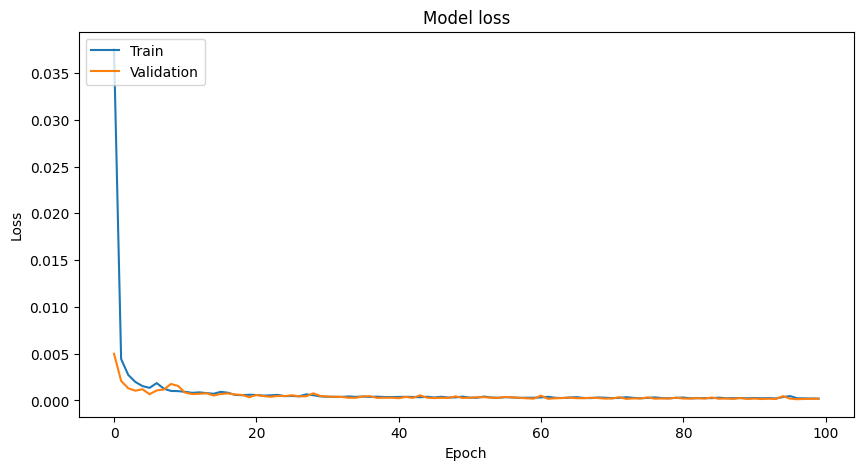

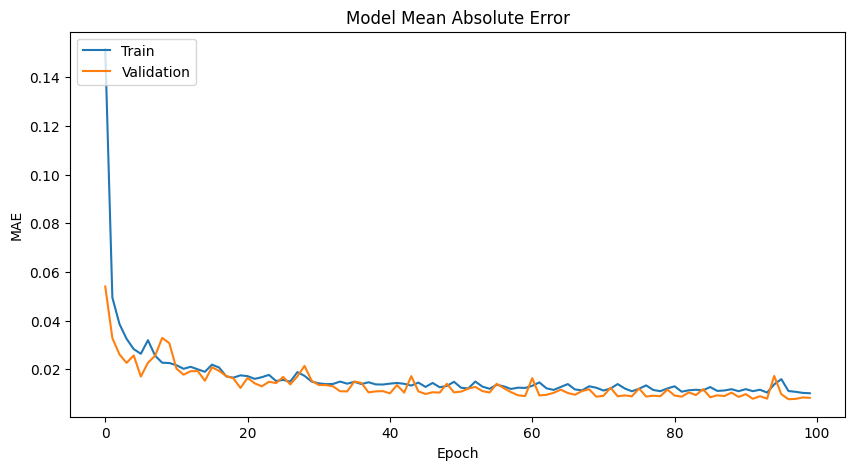

In [ ]:
plot_history(unet_hist)

We then use the `plot_history` function from earlier to make a graph plot of the models training loss over time and also the evaluation metrics.

**U-Net Training Log**

The model gets better over time as shown by the gentle slope as it approaches 100 epochs. The loss goes down consistently, which is good. It means the model is learning well. By the end, the model's loss is quite low, showing it learned a lot. The validation loss, which is also low, means the model is doing well even on new data it hasn't seen before. Overall, the model learns steadily and improves nicely during training and outperforms the other models while still showing more potential to continue learning.

In [ ]:
# Save the Model
unet_model.save('/content/drive/MyDrive/W22020024_AI_MODELS/models/unet_model_1.keras')

We call the `save` method to save the trained model on our google drive so we can always load and use the model anytime.

## MODEL EVALUATION

In [ ]:
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

We imported  `structural_similarity` package which is a metric used to measure the similarity between two images. It evaluates the similarity in structure, luminance, and contrast of the images. SSIM is widely used in image processing and computer vision tasks as it provides a more accurate assessment of image quality compared to traditional pixel-wise metrics like mean squared error (MSE).

We also added the `peak_signal_noise_ratio` which is a widely used metric for evaluating the quality of reconstructed or processed images or videos. It measures the quality of an image by comparing it with a reference image and quantifying the amount of noise present in the reconstructed image.

In [ ]:
cnn_model = tf.keras.models.load_model('/content/drive/MyDrive/W22020024_AI_MODELS/models/cnn_model_1.keras')
resnet_model = tf.keras.models.load_model('/content/drive/MyDrive/W22020024_AI_MODELS/models/resnet_model_1.keras')
unet_model = tf.keras.models.load_model('/content/drive/MyDrive/W22020024_AI_MODELS/models/unet_model_1.keras')

The trained models were then loaded to memory from the saved location.

In [ ]:
def psnr(y_true, y_pred):
  _psnr = tf.py_function(lambda yt, yp: peak_signal_noise_ratio(yt.numpy(), yp.numpy()), [y_true, y_pred], tf.float32)
  return _psnr

def ssim(y_true, y_pred):
  _ssim = tf.py_function(lambda yt, yp: structural_similarity(yt.numpy(), yp.numpy()), [y_true, y_pred], tf.float32)
  return _ssim

The `peak_signal_noise_ratio` and `structural_similarity` are numpy packages, hence we have to pass it through the `tf.py_function` to be able to proccess tensors from tensorflow.

In [ ]:
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae', psnr, ssim])
resnet_model.compile(optimizer='adam', loss='mse', metrics=['mae', psnr, ssim])
unet_model.compile(optimizer='adam', loss='mse', metrics=['mae', psnr, ssim])

We then added the new metrics to our models

In [ ]:
eval = {
    "Simple CNN": cnn_model.evaluate(test_ds),
    "Res-Net": resnet_model.evaluate(test_ds),
    "U-Net": unet_model.evaluate(test_ds)
}

13/13 [==============================] - 13s 804ms/step - loss: 1.8408e-04 - mae: 0.0082 - psnr: 37.3790 - ssim: 0.9986


This block evaluates the test data with all our evalution metrics and stores them in a python dictionary

In [ ]:
print("EVALUATION METRICS", '\n\n')
print("MODELS      ", "  MAE  |", "PSNR |", "SSIM" '\n')
for k, v in eval.items():
  print(k," "*(10-len(k)),  end='|| ')
  print(round(v[1], 3), round(v[2], 1), round(v[3], 2), sep=' | ')

EVALUATION METRICS 


MODELS         MAE  | PSNR | SSIM

Simple CNN || 0.221 | 11.7 | 0.07
Res-Net    || 0.121 | 15.5 | 0.76
U-Net      || 0.03 | 25.9 | 0.97


In [ ]:
print("EVALUATION METRICS", '\n\n')
print("MODELS      ", "  MAE  |", "PSNR |", "SSIM" '\n')
for k, v in eval.items():
  print(k," "*(10-len(k)),  end='|| ')
  print(round(v[1], 3), round(v[2], 1), round(v[3], 3), sep=' | ')

EVALUATION METRICS 


MODELS         MAE  | PSNR | SSIM

U-Net      || 0.008 | 37.4 | 0.999


**Based on these metrics:**

* The U-Net model outperforms both the Simple CNN and Res-Net models in terms of all three metrics (MAE, PSNR, SSIM), indicating superior performance in image correction.
* Res-Net performs better than the Simple CNN model, showing lower MAE, higher PSNR, and significantly higher SSIM, indicating better image quality and similarity to the ground truth.
* U-Net achieves the lowest MAE, highest PSNR, and highest SSIM among the three models, suggesting the most accurate and visually similar results to the ground truth images.

### Visual Inspection

In [ ]:
def display_images_from_models(dataset, models:list = None):
    # Get one batch of data from the dataset

    for batch in dataset.take(np.random.randint(1, len(dataset))):
        image_1 = batch[0][0].numpy()
        label_1 = batch[1][0].numpy().reshape((128, 128, 3))
        image_2 = batch[0][1].numpy()
        label_2 = batch[1][1].numpy().reshape((128, 128, 3))
        # print(image_1.shape, label_1.shape)

    # Display images and labels side by side
    plt.figure(figsize=(16, 6))

    for i in range(2+len(models)):  # Display at most 4 images for better visualization
        if i == 0:
          img_1 = image_1
          img_2 = image_2
          title = f"Defect Image"
        elif i <= len(models):
          model = models[i-1][0]
          img_1 = model.predict(tf.expand_dims(image_1, axis=0)).reshape((128, 128, 3))
          img_2 = model.predict(tf.expand_dims(image_2, axis=0)).reshape((128, 128, 3))
          title = models[i-1][1]
        else:
          img_1 = label_1
          img_2 = label_2
          title = f"Clear Image"

        plt.subplot(2, 5, i + 1)
        plt.imshow(img_1)
        plt.title(title)
        plt.axis("off")

        plt.subplot(2, 5, i + 6)
        plt.imshow(img_2)
        plt.title(title)
        plt.axis("off")

    plt.show()

The `display_images_from_models` function displays defective images and their clear images generated by models specified for visual comparison. We will use this function to visually inspect the corrections by each model.

**Parameters:**
- dataset: tf.data.Dataset
    The dataset containing image-label pairs.
- models: list, optional
    A list of tuples where each tuple contains a model and its corresponding title for display.


1/1 [==============================] - 0s 59ms/step


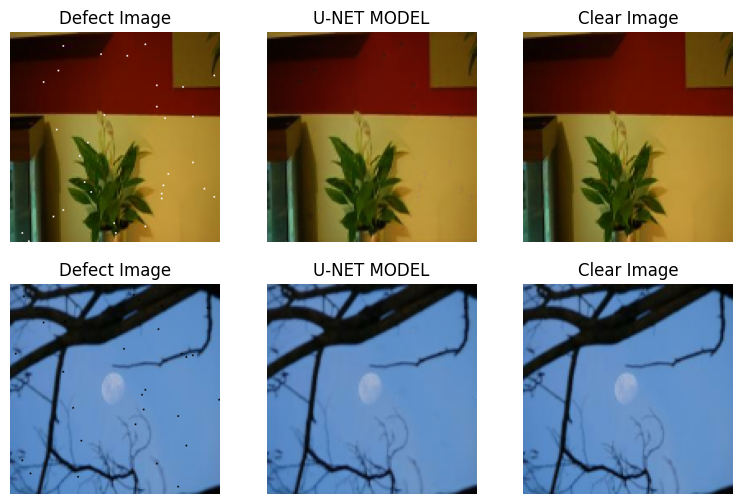

In [ ]:
display_images_from_models(test_ds, [(unet_model, "U-NET MODEL")])

1/1 [==============================] - 0s 22ms/step


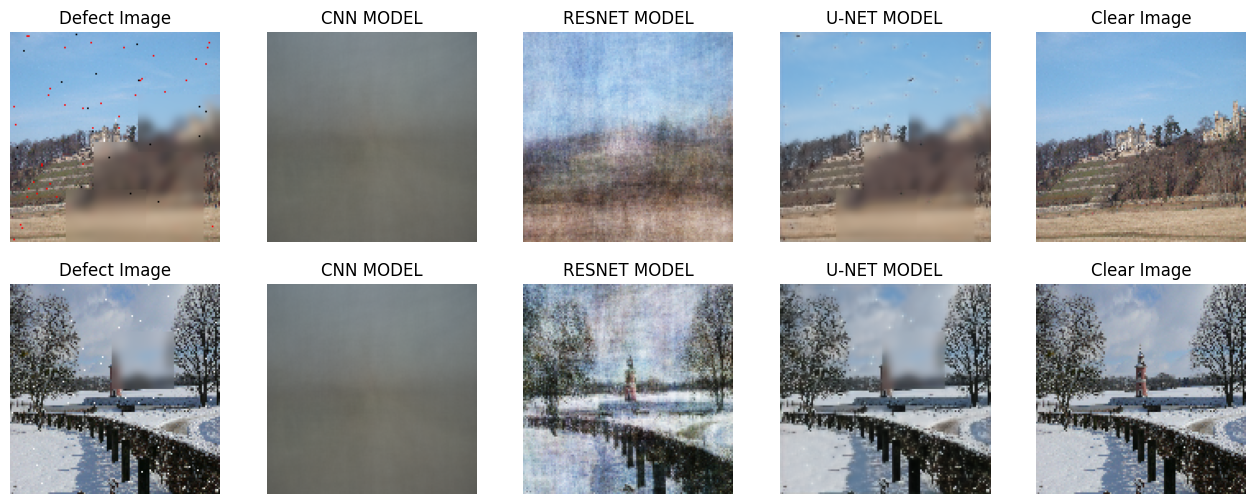

In [ ]:
display_images_from_models(test_ds, [(cnn_model, "CNN MODEL"), (resnet_model, "RESNET MODEL"), (unet_model, "U-NET MODEL")])

1/1 [==============================] - 0s 21ms/step


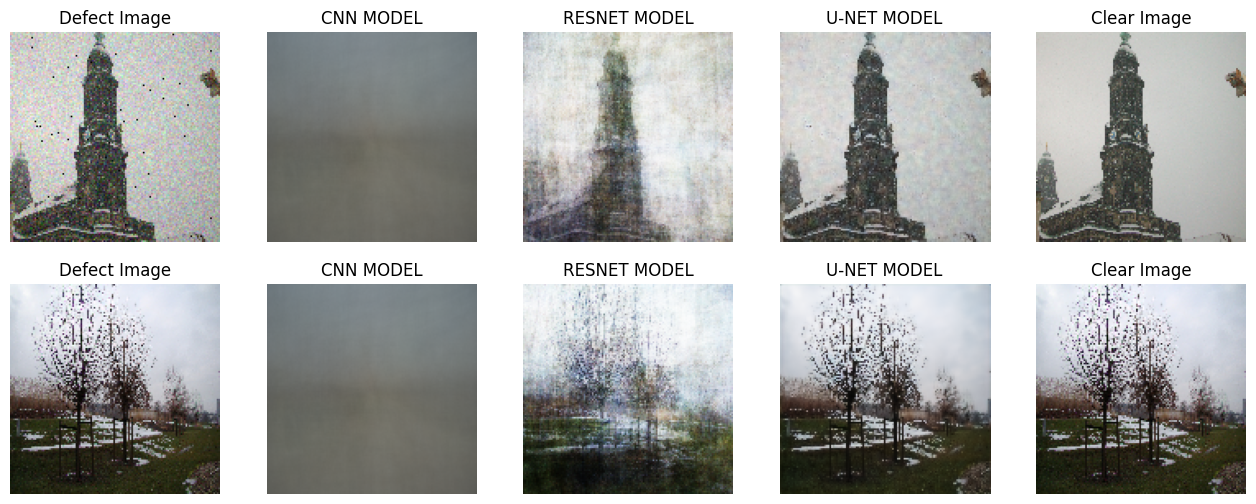

In [ ]:
display_images_from_models(test_ds, [(cnn_model, "CNN MODEL"), (resnet_model, "RESNET MODEL"), (unet_model, "U-NET MODEL")])

1/1 [==============================] - 0s 21ms/step


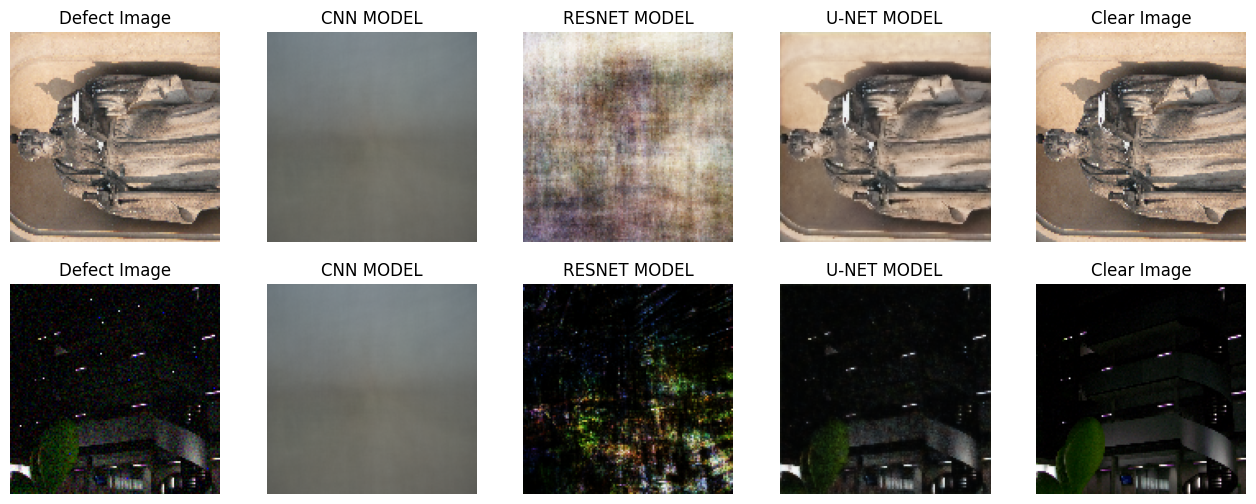

In [ ]:
display_images_from_models(test_ds, [(cnn_model, "CNN MODEL"), (resnet_model, "RESNET MODEL"), (unet_model, "U-NET MODEL")])

Model performance inspection with random images on the test set that the model has never seen. We can observe that the U-Net outperforms all other models producing images close enough to the clear versions although it experiences difficulty correcting blur defects.

### MERGING BOTH MODELS

In [ ]:
# Load the Model
unet_model = tf.keras.models.load_model('/content/drive/MyDrive/W22020024_AI_MODELS/models/unet_model_1.keras')
unet_model_clf = tf.keras.models.load_model('/content/drive/MyDrive/W22020024_AI_MODELS/models/unet_clf_model_1.keras')

In [ ]:
def display_result_from_both_models(dataset, cfl_model, corr_model):
    # Get one batch of data from the dataset

    for batch in dataset.take(np.random.randint(1, len(dataset))):
        image_1 = batch[0][0].numpy()
        label_1 = batch[1][0].numpy()

    # Display images and labels side by side
    plt.figure(figsize=(16, 6))

    for i in range(5):  # Display at most 4 images for better visualization
        if i == 0:
          img_1 = image_1
          title = f"Defect Image"
        elif i == 1:
          img_1 = label_1
          title = f"True Mask"
        elif i == 2:
          img_1 = (cfl_model.predict(tf.expand_dims(image_1, axis=0))[0] > 0.5)
          masked_image_reshaped = (img_1*image_1)[img_1[:, :, 0]]
          defect_type = 'non-defective' if len(masked_image_reshaped) == 0 else 'dead' if masked_image_reshaped.sum() < 0.1 else 'hot' if masked_image_reshaped.sum()/(len(masked_image_reshaped)*3)>0.99 else 'stuck'
          # print(masked_image_reshaped.sum(), len(masked_image_reshaped))
          title = f"Predicted Mask"
        elif i == 3:
          if defect_type == 'dead':
            img_cpy = np.copy(image_1)
            img_cpy[:, :, :] = .8
            img_1 = ~img_1 * img_cpy
          else:
            img_1 = img_1 * image_1
          title = f"Defect type: {defect_type} pixels"
        elif i == 4:
          img_1 = corr_model.predict(tf.expand_dims(image_1, axis=0)).reshape((*img_size, 3))
          title = "Corrected Image"



        plt.subplot(1, 5, i + 1)
        plt.imshow(img_1)
        plt.title(title)
        plt.axis("off")

    plt.show()

1/1 [==============================] - 1s 691ms/step


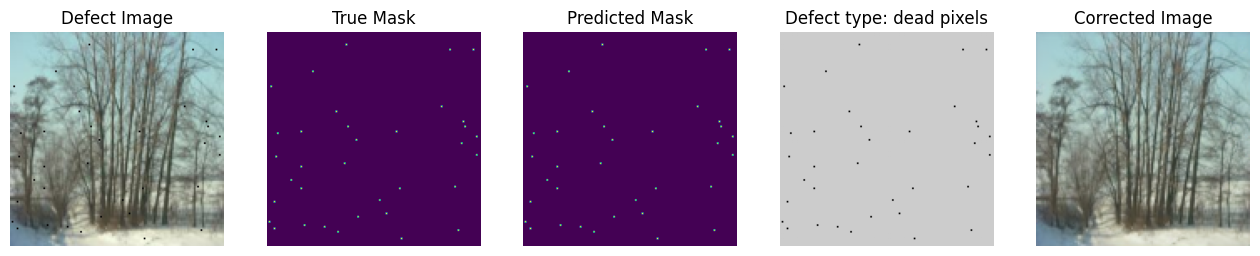

In [ ]:
display_result_from_both_models(test_ds_clf, unet_model_clf, unet_model)